In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [3]:
main_df = pd.read_excel(io='./tfl-daily-cycle-hires.xlsx',sheet_name='Data',header=5,usecols=[1,2,4,5,7,8,11,12,14,15])
main_df.rename(columns={'Number of Bicycle Hires.1': 'Number of Bicycle Hires (Month)', 'Number of Bicycle Hires.2': 'Number of Bicycle Hires (Year)', 'Month.1':'Month (Time)'}, inplace=True)

In [4]:
print(main_df.info())
print("-----------------------------------------------------------")
print(main_df.describe())
print("-----------------------------------------------------------")
print(main_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5085 entries, 0 to 5084
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Day                              5085 non-null   datetime64[ns]
 1   Number of Bicycle Hires          5085 non-null   int64         
 2   Month                            168 non-null    datetime64[ns]
 3   Number of Bicycle Hires (Month)  168 non-null    float64       
 4   Year                             15 non-null     float64       
 5   Number of Bicycle Hires (Year)   15 non-null     float64       
 6   Month (Time)                     168 non-null    datetime64[ns]
 7   Average Hire Time (mins)         168 non-null    float64       
 8   Against last month               153 non-null    float64       
 9   Against last year                153 non-null    float64       
dtypes: datetime64[ns](3), float64(6), int64(1)
memory usage: 397

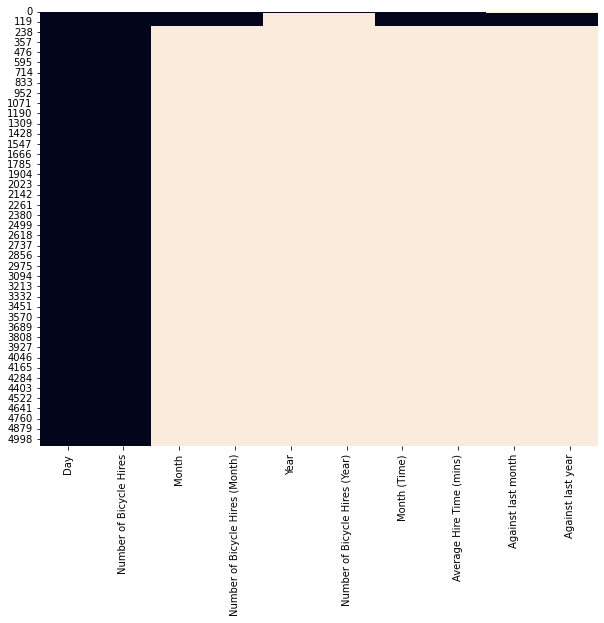

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(main_df.isnull(), cbar=False)
plt.show()

<center><h3>Splitting the main dataframe in to Weekly, Monthly and Yearly Subsets</h3></center>

In [6]:
main_df

,Day,Number of Bicycle Hires,Month,Number of Bicycle Hires (Month),Year,Number of Bicycle Hires (Year),Month (Time),Average Hire Time (mins),Against last month,Against last year
0,2010-07-30,6897,2010-07-01,12461.0,2010.0,2180813.0,2010-07-01,17.232566,NaN,NaN
1,2010-07-31,5564,2010-08-01,341203.0,2011.0,7142449.0,2010-08-01,16.551880,NaN,NaN
2,2010-08-01,4303,2010-09-01,540859.0,2012.0,9519283.0,2010-09-01,15.219079,NaN,NaN
3,2010-08-02,6642,2010-10-01,544412.0,2013.0,8045459.0,2010-10-01,15.204481,NaN,NaN
4,2010-08-03,7966,2010-11-01,456304.0,2014.0,10023897.0,2010-11-01,13.776083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5080,2024-06-26,34515,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5081,2024-06-27,33718,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5082,2024-06-28,29513,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5083,2024-06-29,29372,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [7]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10 ,11]:
        return 'Autumn'


main_df['Day'] = pd.to_datetime(main_df['Day']) 
main_df['Month'] = pd.to_datetime(main_df['Month'], format='%B %Y')
main_df['Season'] = main_df['Month'].map(get_season)

print(main_df['Season'].unique())

daily_hires = main_df.dropna(subset=['Day'])
daily_hires = daily_hires.set_index('Day')

monthly_hires = main_df.dropna(subset=['Month','Number of Bicycle Hires (Month)'])
monthly_hires = monthly_hires.set_index('Month')
print(monthly_hires['Season'].unique())

yearly_hires = main_df.dropna(subset=['Year', 'Number of Bicycle Hires (Year)'])
yearly_hires = yearly_hires.set_index('Year')

['Summer' 'Autumn' 'Winter' 'Spring' None]
['Summer' 'Autumn' 'Winter' 'Spring']


In [8]:
daily_hires

,Number of Bicycle Hires,Month,Number of Bicycle Hires (Month),Year,Number of Bicycle Hires (Year),Month (Time),Average Hire Time (mins),Against last month,Against last year,Season
Day,,,,,,,,,,
2010-07-30,6897,2010-07-01,12461.0,2010.0,2180813.0,2010-07-01,17.232566,NaN,NaN,Summer
2010-07-31,5564,2010-08-01,341203.0,2011.0,7142449.0,2010-08-01,16.551880,NaN,NaN,Summer
2010-08-01,4303,2010-09-01,540859.0,2012.0,9519283.0,2010-09-01,15.219079,NaN,NaN,Autumn
2010-08-02,6642,2010-10-01,544412.0,2013.0,8045459.0,2010-10-01,15.204481,NaN,NaN,Autumn
2010-08-03,7966,2010-11-01,456304.0,2014.0,10023897.0,2010-11-01,13.776083,NaN,NaN,Autumn
...,...,...,...,...,...,...,...,...,...,...
2024-06-26,34515,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,None
2024-06-27,33718,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,None
2024-06-28,29513,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,None


In [9]:
monthly_hires

,Day,Number of Bicycle Hires,Number of Bicycle Hires (Month),Year,Number of Bicycle Hires (Year),Month (Time),Average Hire Time (mins),Against last month,Against last year,Season
Month,,,,,,,,,,
2010-07-01,2010-07-30,6897,12461.0,2010.0,2180813.0,2010-07-01,17.232566,NaN,NaN,Summer
2010-08-01,2010-07-31,5564,341203.0,2011.0,7142449.0,2010-08-01,16.551880,NaN,NaN,Summer
2010-09-01,2010-08-01,4303,540859.0,2012.0,9519283.0,2010-09-01,15.219079,NaN,NaN,Autumn
2010-10-01,2010-08-02,6642,544412.0,2013.0,8045459.0,2010-10-01,15.204481,NaN,NaN,Autumn
2010-11-01,2010-08-03,7966,456304.0,2014.0,10023897.0,2010-11-01,13.776083,NaN,NaN,Autumn
...,...,...,...,...,...,...,...,...,...,...
2024-02-01,2011-01-09,10558,568039.0,NaN,NaN,2024-02-01,15.000000,0.016466,-0.073837,Winter
2024-03-01,2011-01-10,16058,647372.0,NaN,NaN,2024-03-01,16.000000,0.139661,0.026589,Spring
2024-04-01,2011-01-11,16412,685246.0,NaN,NaN,2024-04-01,16.000000,0.058504,0.059278,Spring


In [10]:
yearly_hires

,Day,Number of Bicycle Hires,Month,Number of Bicycle Hires (Month),Number of Bicycle Hires (Year),Month (Time),Average Hire Time (mins),Against last month,Against last year,Season
Year,,,,,,,,,,
2010.0,2010-07-30,6897,2010-07-01,12461.0,2180813.0,2010-07-01,17.232566,NaN,NaN,Summer
2011.0,2010-07-31,5564,2010-08-01,341203.0,7142449.0,2010-08-01,16.551880,NaN,NaN,Summer
2012.0,2010-08-01,4303,2010-09-01,540859.0,9519283.0,2010-09-01,15.219079,NaN,NaN,Autumn
2013.0,2010-08-02,6642,2010-10-01,544412.0,8045459.0,2010-10-01,15.204481,NaN,NaN,Autumn
2014.0,2010-08-03,7966,2010-11-01,456304.0,10023897.0,2010-11-01,13.776083,NaN,NaN,Autumn
2015.0,2010-08-04,7893,2010-12-01,285574.0,9871839.0,2010-12-01,16.820512,NaN,NaN,Winter
2016.0,2010-08-05,8724,2011-01-01,403178.0,10303637.0,2011-01-01,16.093229,NaN,NaN,Winter
2017.0,2010-08-06,9797,2011-02-01,398292.0,10446044.0,2011-02-01,17.249407,NaN,NaN,Winter
2018.0,2010-08-07,6631,2011-03-01,556155.0,10567540.0,2011-03-01,19.952109,NaN,NaN,Spring


<center><h3>Total Week day hires over the years</h3></center>

In [11]:
def get_color_map(unique_values, palette_name='husl'):
    num_values = len(unique_values)
    colors = sns.color_palette(palette_name, num_values)
    return dict(zip(unique_values, colors))

In [12]:
days = daily_hires.index.day_name()
days = days[3:10].tolist()
days

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

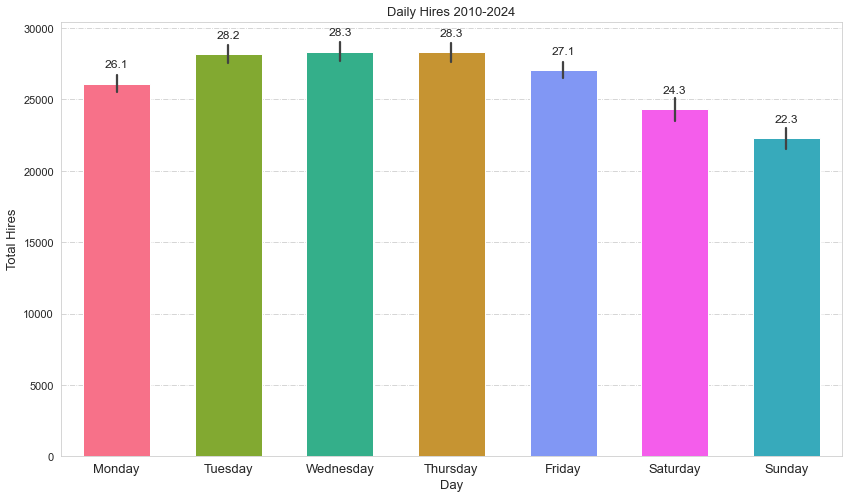

In [13]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
custom_colors1 = get_color_map(unique_values=sorted(set(daily_hires.index.day_name())), palette_name='husl')

plot = sns.barplot(x=daily_hires.index.day_name(), y=daily_hires['Number of Bicycle Hires'],width=0.6, order=days)

for p in plot.patches:
    plot.annotate(format(p.get_height() / 1000, '.1f'),  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 19),
                textcoords = 'offset points', fontsize=12)
    
for bar, x in zip(plot.patches, daily_hires.index.day_name()):
    bar.set_facecolor(custom_colors1[x])
    
plt.title('Daily Hires 2010-2024',fontsize=13)
plt.xlabel('Day',fontsize=13)
plt.ylabel('Total Hires',fontsize=13)
plt.xticks(range(0,7), days, fontsize=13)
plt.yticks(range(0,35000,5000), fontsize=11)
plt.show()

<center><h3>Total Monthly hires over the years</h3></center>

In [14]:
monthly_index = monthly_hires.index.month_name()
monthly_index = monthly_index.to_series().iloc[6:18].tolist()
monthly_index

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

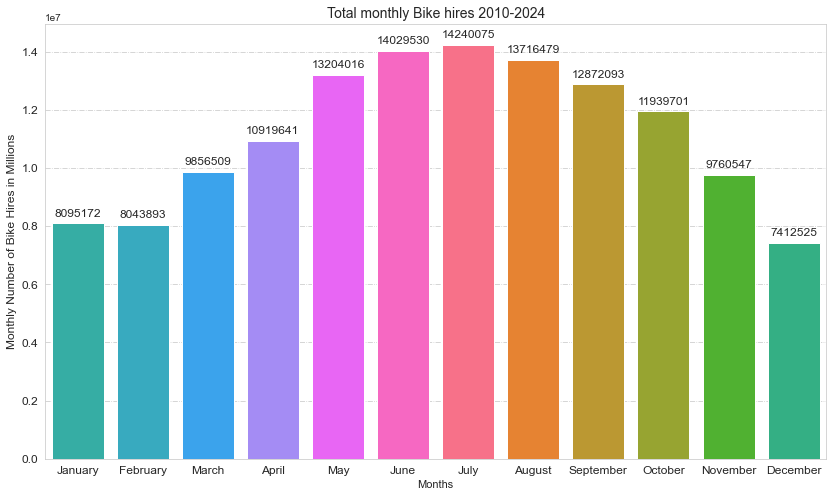

In [15]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
custom_colors2 = get_color_map(unique_values=sorted(set(monthly_hires.index.month)), palette_name='husl')

monthly_total = monthly_hires.groupby(monthly_hires.index.month)['Number of Bicycle Hires (Month)'].sum()

plot_2 = sns.barplot(x=monthly_total.index,y=monthly_total)

for p in plot_2.patches:
    plot_2.annotate(format(p.get_height() / 1, '.0f'),  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points', fontsize=12)
    
for bar, x in zip(plot_2.patches, monthly_hires.index.month):
    bar.set_facecolor(custom_colors2[x])
    
plt.title('Total monthly Bike hires 2010-2024',fontsize=14)
plt.xlabel('Months',fontsize=11)
plt.ylabel('Monthly Number of Bike Hires in Millions',fontsize=12)
plt.xticks(range(0,12),monthly_index, fontsize=12)
plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)
plt.show()

<center><h3>Total Yearly hires over the years</h3></center>

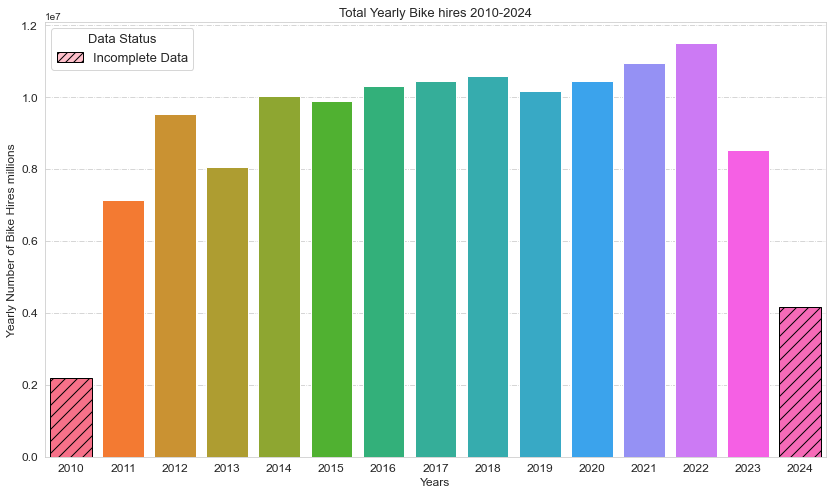

In [16]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
custom_colors3 = get_color_map(unique_values=sorted(set(yearly_hires.index.astype(int))), palette_name='husl')

plot_3 = sns.barplot(x=yearly_hires.index.astype(int), y='Number of Bicycle Hires (Year)', data=yearly_hires)
first_year, last_year = yearly_hires.index.min(), yearly_hires.index.max()

for bar, year in zip(plot_3.patches, yearly_hires.index):
    if year in [first_year, last_year]:
        bar.set_hatch('//')
        bar.set_edgecolor('black')
    else:
        bar.set_hatch('')

    bar.set_facecolor(custom_colors3[year])

legend_elements = [Patch(facecolor='pink', edgecolor='black', hatch='///', label='Incomplete Data')]
plt.title('Total Yearly Bike hires 2010-2024', fontsize=13)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Yearly Number of Bike Hires millions', fontsize=12)
plt.legend(handles=legend_elements, title='Data Status', fontsize=13, title_fontsize=13)
plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)
plt.show()

<center><h3>Total seasonal hires over the years</h3></center>

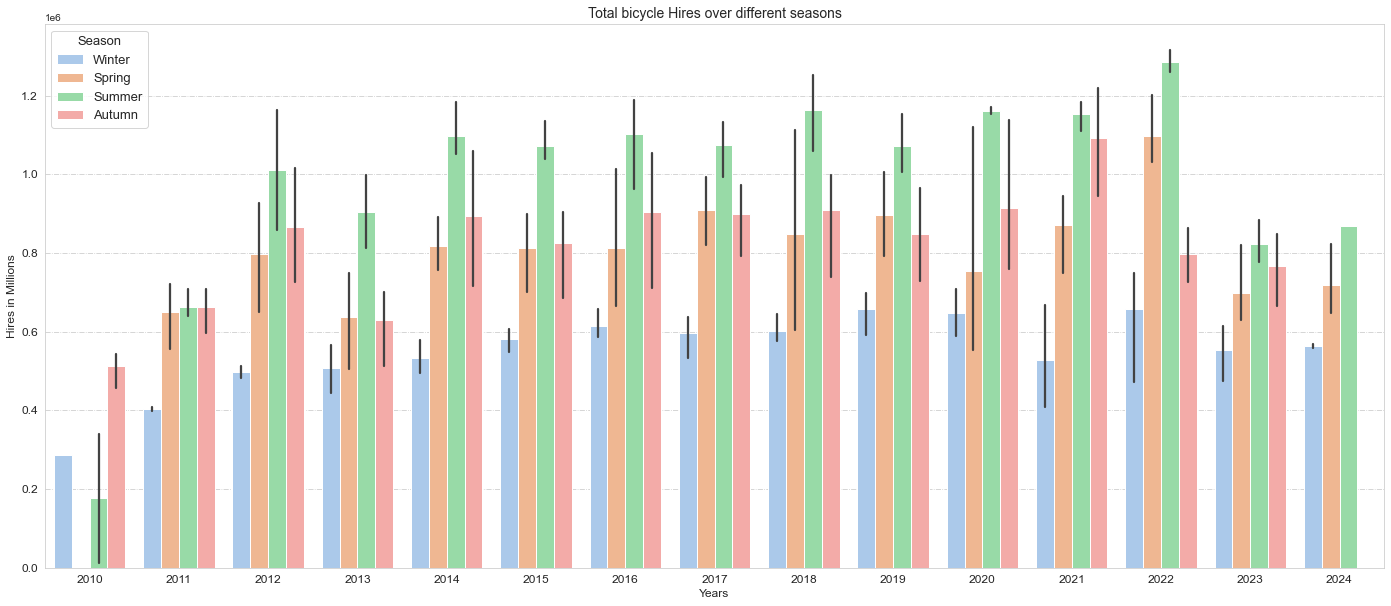

In [17]:
plt.figure(figsize=(24,10))
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
sns.barplot(x=monthly_hires.index.year, y=monthly_hires['Number of Bicycle Hires (Month)'], hue=monthly_hires['Season'], hue_order=['Winter', 'Spring', 'Summer', 'Autumn'], palette='pastel', width=0.8)
plt.title('Total bicycle Hires over different seasons', fontsize=14)
plt.ylabel('Hires in Millions', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)
plt.legend(loc='upper left', title='Season',fontsize=13, title_fontsize=13)
plt.show()

<center><h3>Monthly Bike Hire vs Average hire Time [ Scatter Plot ]</h3></center>

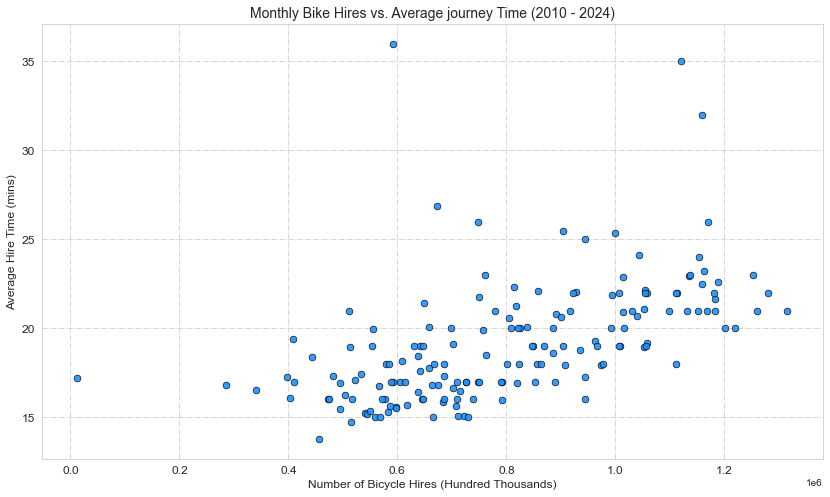

In [18]:
plt.figure(figsize=(14, 8))
plt.scatter(monthly_hires['Number of Bicycle Hires (Month)'], monthly_hires['Average Hire Time (mins)'], 
            alpha=0.9, color='dodgerblue', edgecolors='black', s=45, linewidth=0.7)
plt.title('Monthly Bike Hires vs. Average journey Time (2010 - 2024)', fontsize=14)
plt.xlabel('Number of Bicycle Hires (Hundred Thousands)', fontsize=12)
plt.ylabel('Average Hire Time (mins)', fontsize=12)
plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)
plt.grid(True)
plt.show()

<center><h3>Average Monthly Bike Journey over the years [ scatter Plot ]</h3></center>

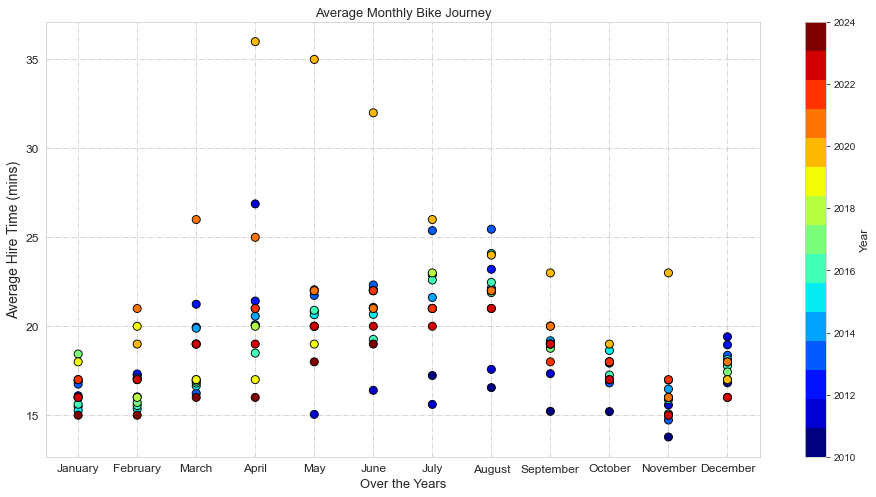

In [19]:
years = monthly_hires.index.year
unique_years = years.unique()
cmap = plt.get_cmap('jet', len(unique_years))

norm = plt.Normalize(unique_years.min(), unique_years.max())
colours = cmap(norm(years))

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
plt.scatter(monthly_hires.index.month, monthly_hires['Average Hire Time (mins)'], 
            alpha=1, c=years, cmap=cmap, edgecolors='black', s=65, linewidth=0.9)
plt.title('Average Monthly Bike Journey', fontsize=13)
plt.xlabel('Over the Years', fontsize=13)
plt.ylabel('Average Hire Time (mins)',fontsize=14)
plt.xticks(range(1,13),monthly_index, fontsize=12)

cbar = plt.colorbar()
cbar.set_label('Year', fontsize=12)

plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)

plt.grid(True)
plt.show()

<center><h3>Average Bike journey over different seasons [ Box Plot ]</h3></center>

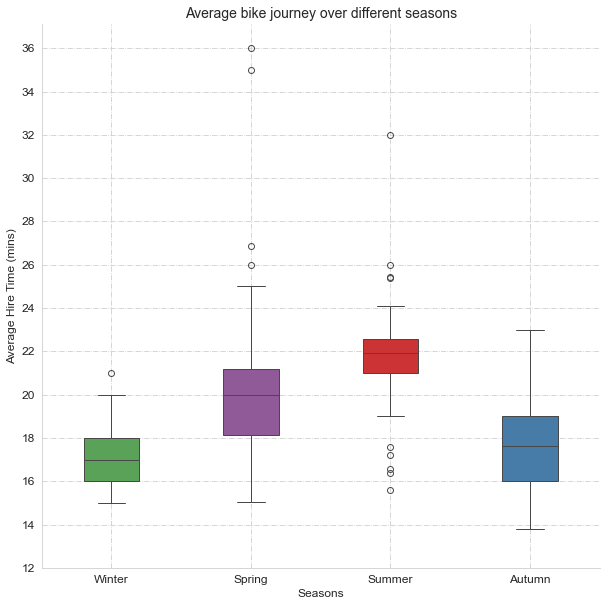

In [20]:
sns.set_palette("Set1")
plt.figure(figsize=(10,10))
order = ['Winter', 'Spring', 'Summer', 'Autumn']
sns.boxplot(x=monthly_hires['Season'], y=monthly_hires['Average Hire Time (mins)'], 
            order=order,width=0.4, hue=monthly_hires['Season'])
y_values = list(range(12,38,2))

plt.title('Average bike journey over different seasons', fontsize=14)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Average Hire Time (mins)', fontsize=12)

plt.yticks(y_values)
plt.grid(True, linestyle='-.')
plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)
sns.despine()
plt.show()

<center><h3> Distributions and Kde Plots </h3></center>

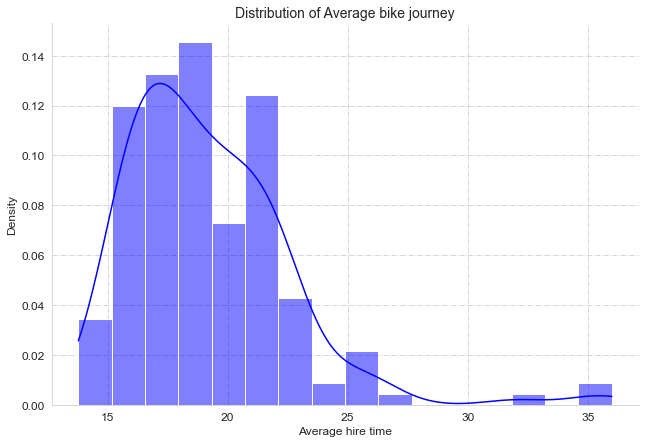

In [21]:
sns.displot(data=monthly_hires, x = 'Average Hire Time (mins)', kde=True, stat = 'density', height=6, aspect=1.5, color='blue')
plt.title('Distribution of Average bike journey', fontsize=14)
plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)
plt.xlabel('Average hire time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()

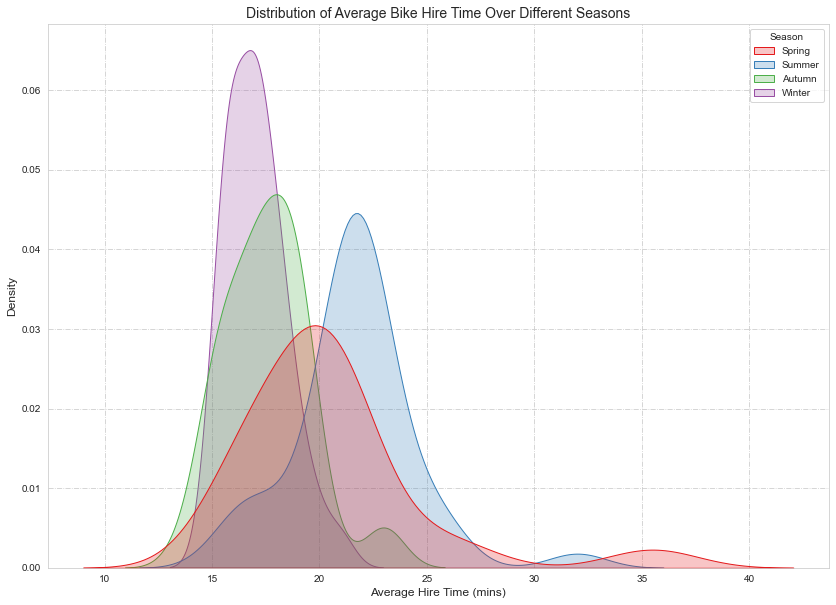

In [22]:

plt.figure(figsize=(14,10))
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
sns.kdeplot(data=monthly_hires, x='Average Hire Time (mins)', hue='Season', hue_order=['Spring', 'Summer', 'Autumn', 'Winter'],fill=True)
plt.title('Distribution of Average Bike Hire Time Over Different Seasons', fontsize=14)
plt.xlabel('Average Hire Time (mins)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()

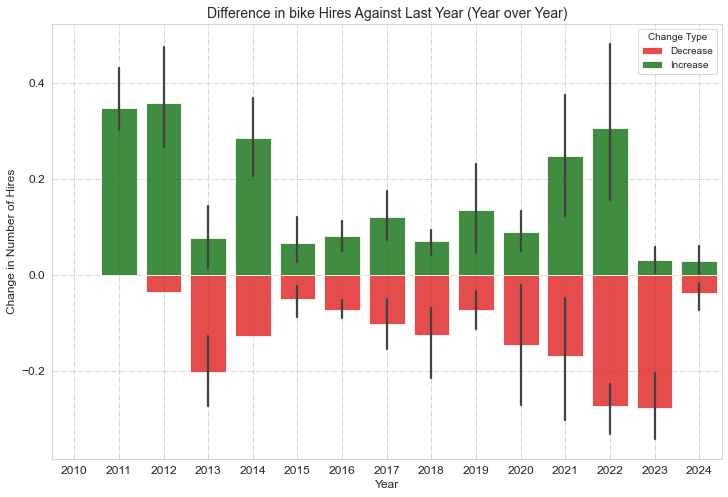

In [23]:
monthly_hires['Change Type'] = np.where(monthly_hires['Against last year'] >= 0, 'Increase', 'Decrease')
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid", {'grid.linestyle': '-.'})


bars = sns.barplot(x=monthly_hires.index.year, y=monthly_hires['Against last year'], hue=monthly_hires['Change Type'], 
                   palette={'Increase': 'green', 'Decrease': 'red'},alpha=0.8, 
                   dodge=False) 


plt.title('Difference in bike Hires Against Last Year (Year over Year)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Change in Number of Hires', fontsize=12)
plt.tick_params('x', labelsize=12)
plt.tick_params('y', labelsize=12)
plt.grid(True)
plt.legend(title='Change Type')
plt.show()